In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.plot import *
from sgpi.util import get_dataset
from sgpi.mnist import *
import itertools

import matplotlib.gridspec as gs
import matplotlib.ticker as plticker

import pysgpp as sg
from PIL import Image


In [2]:
def plot_points(neighbors):
    img = np.zeros((8,8))
    first = True
    for n in neighbors:
        if first:
            intensity = 0.9
            first = False
        else:
            intensity = 0.5
        img[n[0]][n[1]] = intensity
    img = Image.fromarray(np.uint8(plt.cm.Blues(img)*255))
    size = figsize(0.4)[0]
    fig = plt.figure(figsize=(size, size))
    grid = gs.GridSpec(nrows=1, ncols=1, left=0.15, bottom=0.2, right=0.99, top=0.99,
        wspace=0.0, hspace=0., width_ratios=[1], height_ratios=[1])
    ax = fig.add_subplot(grid[0])
       
    ax.imshow(img, interpolation='nearest')
    ax.autoscale(False)
    
    # Generate grid
    
    grid_args = {'c': 'gray', 'linewidth': 0.2}
    ticks = np.arange(0,8)
    for tick in ticks:
        ax.axhline(tick + 0.5, **grid_args)
        ax.axvline(tick + 0.5,  **grid_args)
    ax.axhline(-0.5, **grid_args)
    ax.axvline(-0.5, **grid_args)
       
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    return fig, ax

In [3]:
df_train = get_dataset('optdigits_train')

In [188]:
#df_train.describe()


(8, 8)
(8, 8, 4)


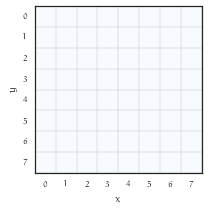

In [260]:
#grid = gs.GridSpec(nrows=1, ncols=1, left=0.15, bottom=0.2, right=0.99, top=0.97,
#        wspace=0.0, hspace=0., width_ratios=None)
#plt.subplot(grid[0])
fig, ax = plot_points([])

(<matplotlib.figure.Figure at 0x7fd109e80810>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd109dc8110>)

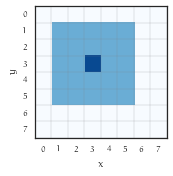

In [5]:
x = np.arange(0,8)
y = np.arange(0,8)
neighbors_l2 = get_neighbors(3, 3, x, y, l2_distance,2**0.5)
neighbors_l1 = get_neighbors(3, 3, x, y, l1_distance,2)

neighbors_ll = get_neighbors(3, 3, x, y, l2_distance, 2*np.sqrt(2))
plot_points(neighbors_ll)

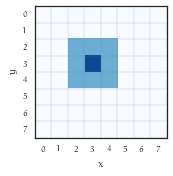

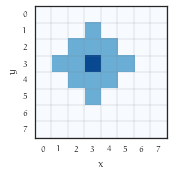

In [7]:
fig, ax = plot_points(neighbors_l2)
fig.savefig("../writing/thesis/figures/nn_l2.svg", dpi=1000)

fig, ax = plot_points(neighbors_l1)
fig.savefig("../writing/thesis/figures/nn_l1.pdf", dpi=1000)

In [16]:
all_neighbors = get_all_neighbors(x, y, l2_distance, np.sqrt(2))
all_inter = get_all_inter(all_neighbors, 3)

In [9]:
sorted([i for i in all_neighbors if 0 in i])

[[9, 0, 8, 1],
 [10, 9, 0, 8, 1, 2],
 [10, 16, 18, 9, 0, 17, 8, 1, 2],
 [16, 9, 0, 17, 8, 1]]

In [40]:
all_inter = mnist_interactions(l2_distance, 2*2**0.5, 3)
grid = sg.Grid.createModLinearGrid(64)
gen = sg.HashGenerator()
storage = grid.getStorage()
#gen.regular(storage, 4)
gen.regularInter(storage, 3, all_inter, 0.0)
grid.getSize()


2569

In [11]:
t = np.array([0,0,0,0,14,13,1,0,0,0,0,5,16,16,2,0,0,0,0,14,16,12,0,0,0,1,10,16,16,12,0,0,0,3,12,14,16,9,0,0,0,0,0,5,16,15,0,0,0,0,0,4,16,14,0,0,0,0,0,1,13,16,1,0])

In [9]:
def feature_to_img(features, fig, ax, cmap='Reds'):
    img = features.reshape(-8,8)
    ax.imshow(img, alpha=0.8, cmap=cmap, interpolation='nearest')
    return fig, ax

(<matplotlib.figure.Figure at 0x7f7a75ab8d90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a70899110>)

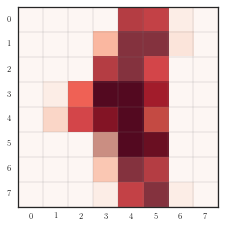

In [13]:
fig, ax = plot_points(neighbors)
feature_to_img(t, fig, ax)

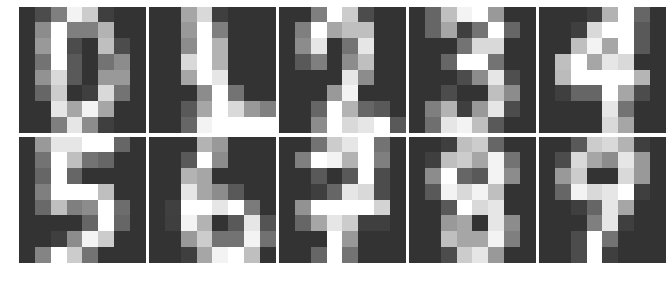

In [12]:
fig_width = figsize(1.0)[0]
g = df_train.groupby(df_train['digit'])
fig, axs = plt.subplots(2,5, figsize=(2*fig_width, fig_width))
for i in range(0,10):    
    ax = axs[i / 5][i % 5]
    g0 = g.get_group(i % 10)
    feature_to_img(g0.values[i,0:-1], fig, ax, cmap='gray')
    ax.set_axis_off()
fig.subplots_adjust(hspace=-0.33, wspace=0.03)
fig.savefig("../writing/thesis/figures/optdigits.pdf", bbox='tight', bbox_inches='tight', transparent=True)

In [3]:
interactions = mnist_interactions(l2_distance, 2**0.5, 4)

In [4]:
len(interactions), interactions

(1142,
 [[0],
  [0, 1],
  [0, 1, 2],
  [0, 1, 8],
  [0, 1, 9],
  [0, 1, 10],
  [0, 2, 9],
  [0, 8],
  [0, 8, 9],
  [0, 8, 16],
  [0, 8, 17],
  [0, 9],
  [0, 9, 10],
  [0, 9, 16],
  [0, 9, 17],
  [0, 9, 18],
  [1],
  [1, 2],
  [1, 2, 3],
  [1, 2, 8],
  [1, 2, 9],
  [1, 2, 10],
  [1, 2, 11],
  [1, 3, 10],
  [1, 8],
  [1, 8, 9],
  [1, 8, 10],
  [1, 8, 16],
  [1, 8, 17],
  [1, 9],
  [1, 9, 10],
  [1, 9, 16],
  [1, 9, 17],
  [1, 9, 18],
  [1, 10],
  [1, 10, 11],
  [1, 10, 17],
  [1, 10, 18],
  [1, 10, 19],
  [2],
  [2, 3],
  [2, 3, 4],
  [2, 3, 9],
  [2, 3, 10],
  [2, 3, 11],
  [2, 3, 12],
  [2, 4, 11],
  [2, 8, 9],
  [2, 9],
  [2, 9, 10],
  [2, 9, 11],
  [2, 9, 16],
  [2, 9, 17],
  [2, 9, 18],
  [2, 10],
  [2, 10, 11],
  [2, 10, 17],
  [2, 10, 18],
  [2, 10, 19],
  [2, 11],
  [2, 11, 12],
  [2, 11, 18],
  [2, 11, 19],
  [2, 11, 20],
  [3],
  [3, 4],
  [3, 4, 5],
  [3, 4, 10],
  [3, 4, 11],
  [3, 4, 12],
  [3, 4, 13],
  [3, 5, 12],
  [3, 9, 10],
  [3, 10],
  [3, 10, 11],
  [3, 10, 12],
  [3

In [5]:
from sgpi.util import group_list

grid = sg.Grid.createLinearGrid(64)
gen = grid.getGenerator()
gen.regularInter(3, interactions, 0)
g1 = (set(group_list(grid)))
print grid.getSize()
weights = sg.DataVector(np.random.random(grid.getSize()))
func = sg.SurplusRefinementFunctor(weights, 10)
gen.refineInter(func, interactions)
print grid.getSize()
g2 = (set(group_list(grid)))
diff = g2.difference(g1)
diff = [[int(s)-1 for s in p.replace('x', '').split('-')] for p in diff]
g1 = [[int(s)-1 for s in p.replace('x', '').split('-')] for p in g1 if p != 'bias']

1225
1407


In [6]:
for i in diff:
    if i not in interactions:
        print i

In [42]:
l = [i for i in interactions if 5 in i]
l

[[3, 4, 5],
 [3, 5, 12],
 [4, 5],
 [4, 5, 6],
 [4, 5, 11],
 [4, 5, 12],
 [4, 5, 13],
 [4, 5, 14],
 [5],
 [5, 6],
 [5, 6, 7],
 [5, 6, 12],
 [5, 6, 13],
 [5, 6, 14],
 [5, 6, 15],
 [5, 7, 14],
 [5, 11, 12],
 [5, 12],
 [5, 12, 13],
 [5, 12, 14],
 [5, 12, 19],
 [5, 12, 20],
 [5, 12, 21],
 [5, 13],
 [5, 13, 14],
 [5, 13, 20],
 [5, 13, 21],
 [5, 13, 22],
 [5, 14],
 [5, 14, 15],
 [5, 14, 21],
 [5, 14, 22],
 [5, 14, 23]]

In [21]:
def get_neighbors(x, y, xs, ys, metric, threshold):
    neighbors = []
    for p in set(itertools.product(xs.flatten(), ys.flatten())):
        d = metric(x, y, p[0], p[1])
        if d <= threshold:
            neighbors.append((d, p))
    _, neighbors = zip(*sorted(neighbors))
    return neighbors

In [22]:
get_neighbors(5,3, x, y, l2_distance, 2**0.5)

NameError: name 'x' is not defined